# Spatial Cross-Validation

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Spatial-Cross-Validation" data-toc-modified-id="Spatial-Cross-Validation-1">Spatial Cross-Validation</a></span><ul class="toc-item"><li><span><a href="#Spatial-Cross-Validation" data-toc-modified-id="Spatial-Cross-Validation-1.1">Spatial Cross-Validation</a></span></li></ul></li><li><span><a href="#Refrences" data-toc-modified-id="Refrences-2">Refrences</a></span></li></ul></div>

<cite data-cite="4834982/JFZE4RAZ"></cite>

In [10]:
import rpy2.ipython

In [8]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [9]:
%%R
library(tidyverse)

## Spatial Cross-Validation

CV methods work well for most model-assessment problems. On spatial data, however, they break down because they depend on assumptions that are often violated in spatial contexts. In this notebook, we elaborate on these issues before surveying modified CV methods for spatial data.

Spatial data exhibit a few properties that make it difficult to apply standard statistical methods to them. For one, spatial data exhibit spatial autocorrelation, where observations close to each other in space have related values. Figure XX shows this phenomenon in a small sample from a forest ecology dataset collected by XXX. Note how tree species cluster together, so any attributes related to species, e.g., tree height, canopy width, resource consumption, etc., will also show similar spatial clustering patterns.

Spatial autocorrelation often leads to difficulties with statistical methods (e.g., see XXX, XXX]) because many methods assume that observations are independent and identically distributed (i.i.d.). Spatial autocorrelation, however, means that drawing one observation implies that nearby observations will likely be similar to it, thus making it unreasonable to assume that points are i.i.d. As such, many methods, including modeling and model assessment methods, perform worse when naively applied to spatial data.

Interestingly, CV does not necessarily assume that observations are i.i.d. Instead, it depends on a modified assumption of independence based on sampling and resampling. When scientists gather data, they collect a random sample from the population. CV simulates sampling by resampling; rather than sampling from the whole population, CV resamples from the given dataset.

CV assumes that the original sample is representative of the population and that its resamples are collected in the same way that a new sample from the population would be collected. If observations are i.i.d., then this assumption is trivially satisfied. Without an i.i.d. assumption, though, the assumption still holds for spatial data so long as the resampled training and validation sets are collected in the same manner as the original sample was: collected in spatial groups.

K-fold CV, however, does not resample spatial groups of data. Instead, it uses random resampling, which produces training and validation sets whose points are distinct but come from overlapping spatial regions. To illustrate this point, Figure XX gives an example of how one fold of 5-fold CV might partition points into a training set (white points) and a validation set (black points).

In [3]:
Image('../images/5foldcv.png', width=300)

NameError: name 'Image' is not defined

Having training-set points interspersed among validation-set points leads to three main challenges for model assessment. First, the presumed independence between the training set and the validation set is broken. Consider the validation-set point $a$ in Figure XX As indicated by the dotted circle, $a$ is very close to two other points in its corresponding training set. Due to spatial autocorrelation, knowing information about the two nearby training-set observations gives information about $a$. To clarify, suppose that $a$ has a response $y_a$ of the form $y_a = f(\textbf{x}_i) + \epsilon_a $. The training-set points near a would not only tend to have $\textbf{x}_i$ similar to $\textbf{x}_a$, but also tend to have $\epsilon_i$ similar to $\epsilon_a$. Thus, if a model overfits the training set, it would perform exceptionally well on $a$, which would undermine the rationale for using a validation set (instead of training error).

The second challenge is that the spatial autocorrelation structures in the training set are not preserved. The training set in Figure XX contains observations that are more spread out in space, on average, than the original training set. As such, the observations do not exhibit the same degree of spatial autocorrelation as the original training set, which can affect model training.

The final challenge relates to interpolation and extrapolation. Researchers usually want to assess model extrapolation: how well models can predict observations in spatial regions other than those of the original samples. Such observations will often have different latent-variable values. Interspersing training-set points among validation-set points, however, leads to similarities between the latent-variable values of the training and validation sets, since they are drawn from overlapping spatial regions. Thus, K-fold CV would be better at assessing model interpolation: how well the models can predict observations in the same spatial region as the training set.

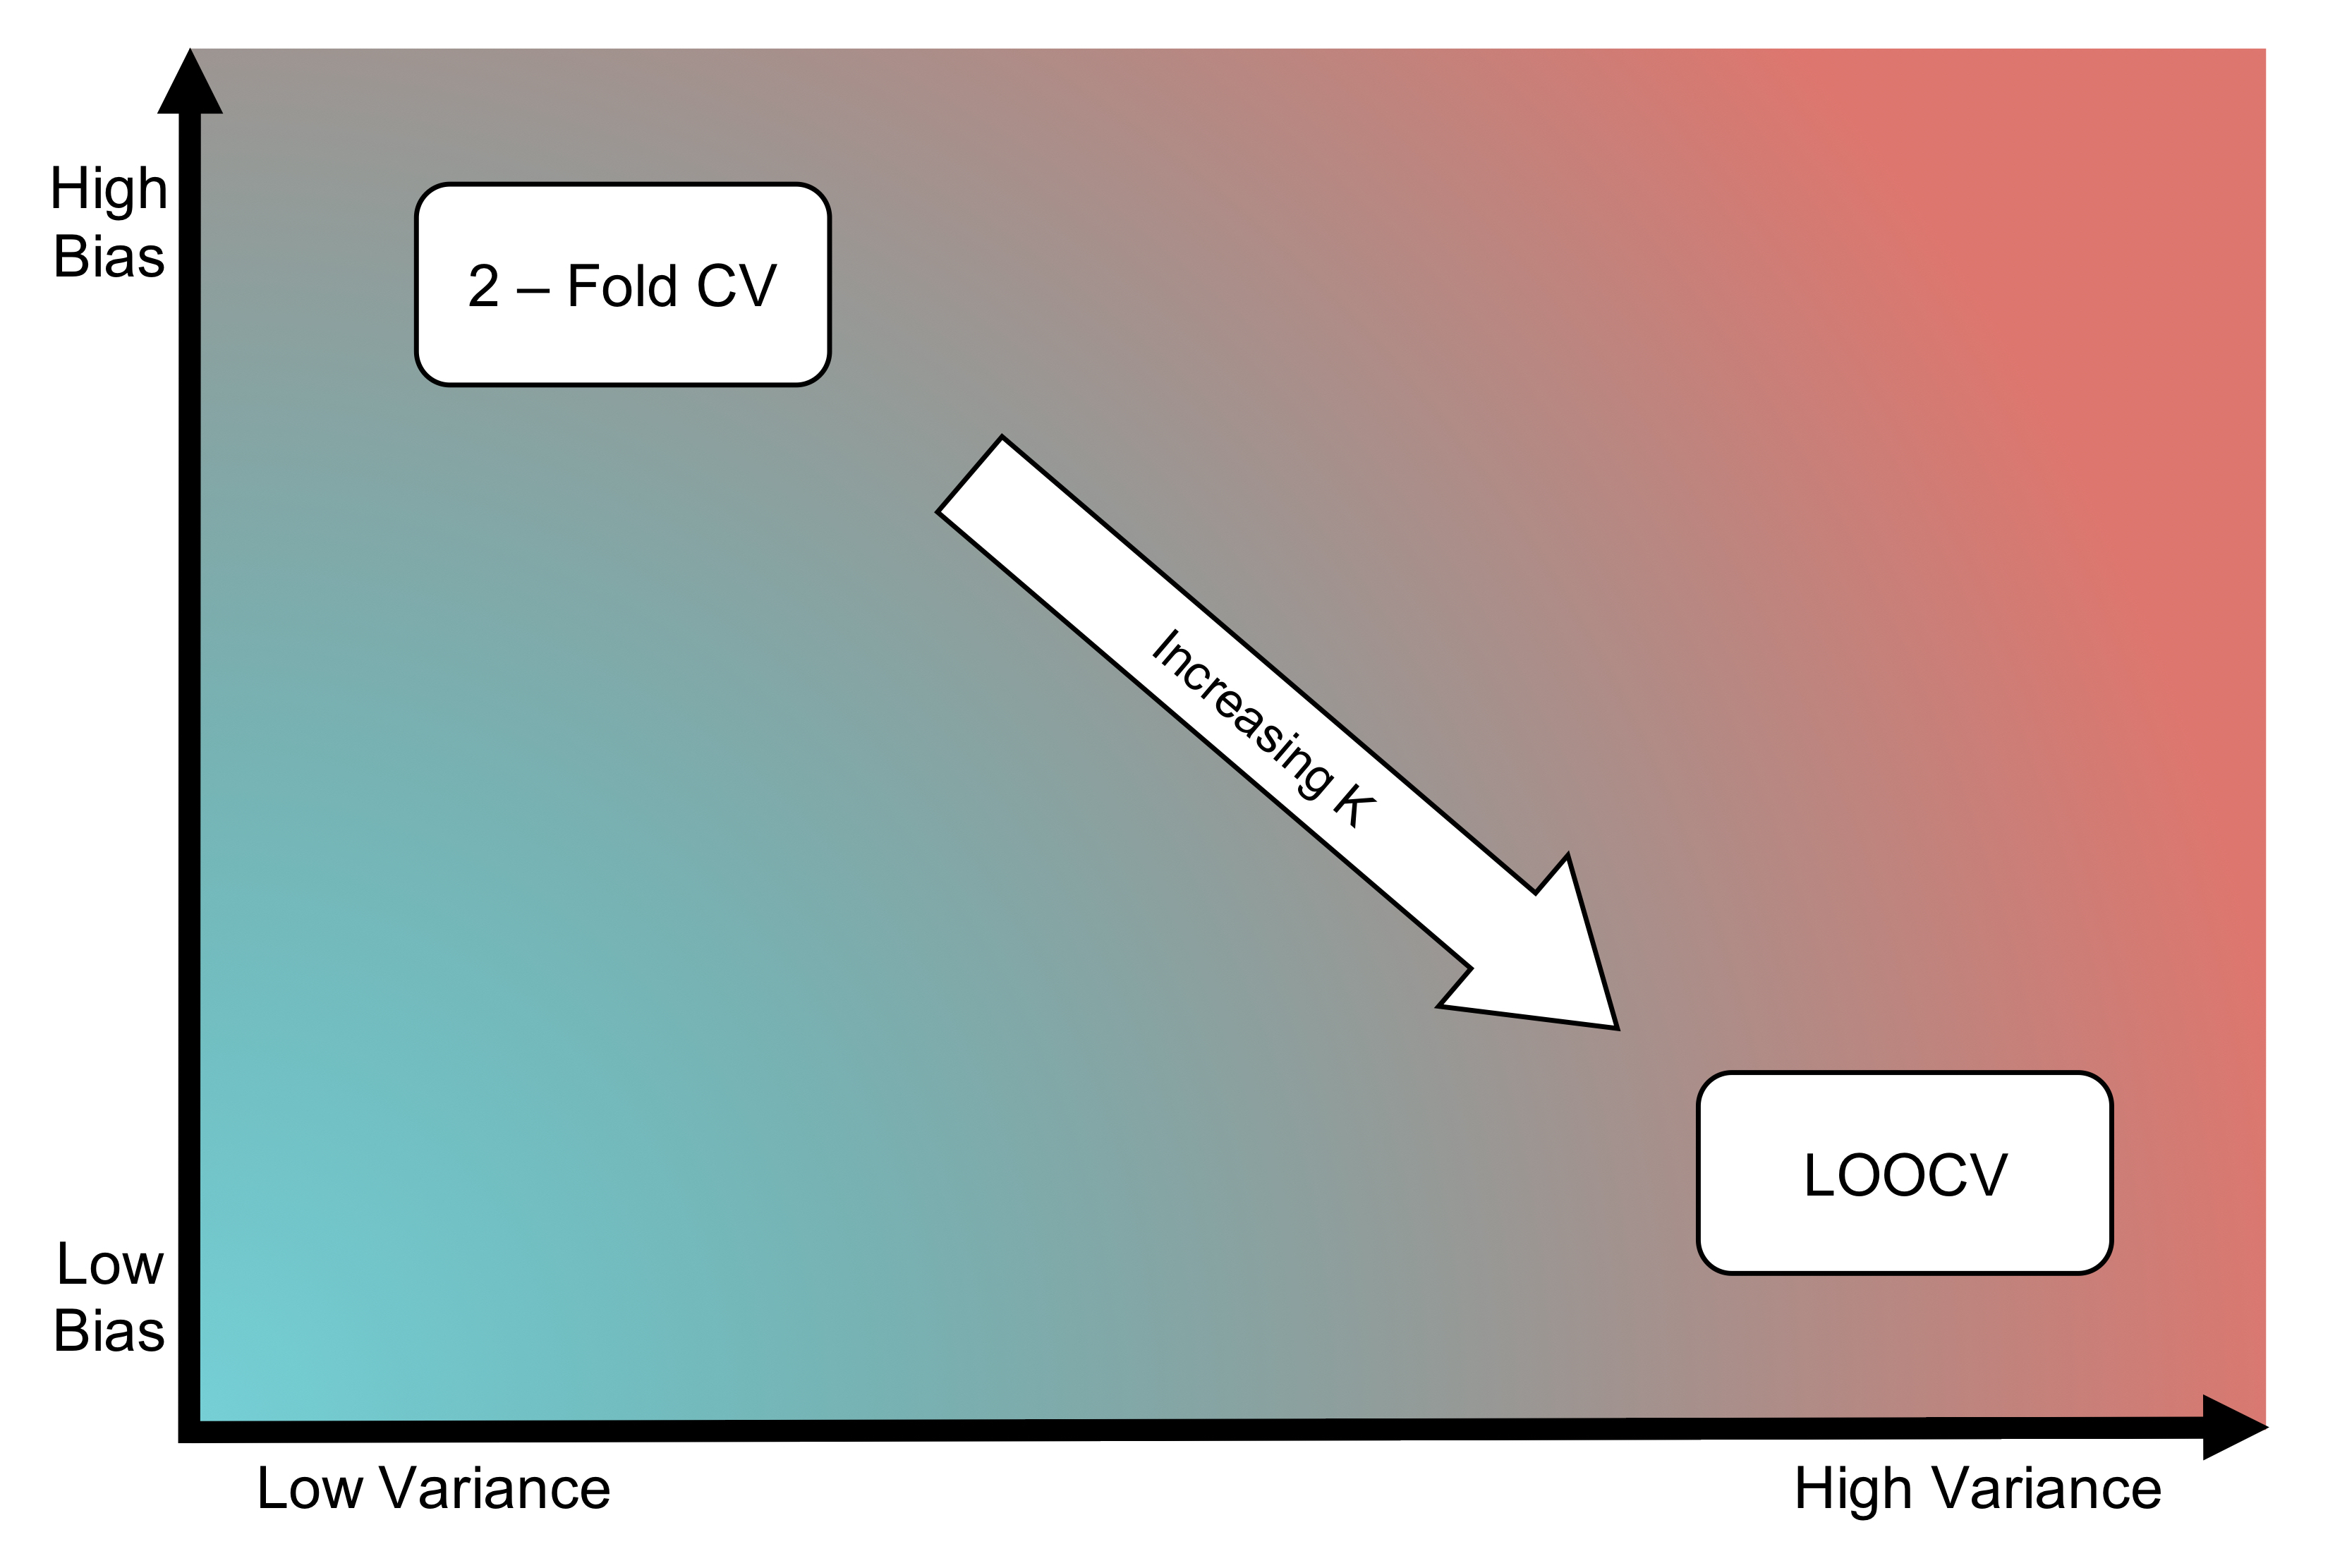

In [24]:
from IPython.display import Image
Image('../images/animation.jpg', width=500)

# Refrences

<div class="cite2c-biblio"></div>